# Matplotlib图形配置

#### 【简介】

为了让我们的图形更加的美化，matplotlib提供了一系列设置图形的方法。

#### 【目录】

1. 配置颜色条
2. 设置注释
3. 自定义坐标刻度
4. 配置文件与样式表

## 1. 配置颜色条

### 任务描述

使用colorbar绘制一个热成像图。

### 相关知识

为了完成本任务，需要掌握：

1. matplotlib指定颜色的方法
2. 如何选择颜色条

#### `Matplotlib`提供了`8`种指定颜色的方法：

- 在`[0，1]`中的浮点值的`RGB`或`RGBA`元组（例如 (`0.1`, `0.2`, `0.5`) 或（`0.1`， `0.2`， `0.5`， `0.3`））。`RGBA`是红色，绿色，蓝色，`Alpha`的缩写

- 十六进制`RGB`或`RGBA`字符串（例如： `#0F0F0F` 或者 `#0F0F0F0F`）

- `[0, 1]`中浮点值的字符串表示，包括灰度级（例如，`0.5`）

- 单字母字符串，例如这些其中之一：{`b`， `g`，`r`， `c`，`m`， `y`， `k`， `w`}

- 一个 `X11`/`CSS4`（`html`）颜色名称，例如：`blue`

- 来自`xkcd`的颜色调研的名称，前缀为 `xkcd`：（例如：`xkcd:sky blue`）

- 一个 `Cn` 颜色规范，即`C` 后跟一个数字，这是默认属性循环的索引（`matplotlib.rcParams[axes.prop_cycle]`）. 索引在艺术家对象创建时发生，如果循环不包括颜色，则默认为黑色

- 其中一个 {`tab:blue`，`tab:orange`，`tab:green`，`tab:red`， `tab:purple`，`tab:brown`，`tab:pink`，`tab:gray`，`tab:olive`， `tab:cyan`}，它们是`tab10`分类调色板中的`Tableau`颜色（这是默认的颜色循环）

【示例代码】

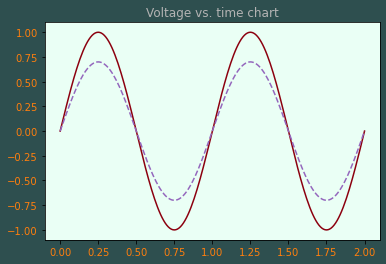

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0.0, 2.0, 201)
s = np.sin(2 * np.pi * t)

fig, ax = plt.subplots(facecolor=(.18, .31, .31))#RGB 元组
ax.set_facecolor('#eafff5')#hex字符串
ax.set_title('Voltage vs. time chart', color='0.7')#灰度字符串
ax.plot(t, s, 'xkcd:crimson')
ax.plot(t, .7*s, color='C4', linestyle='--')#CN颜色选择
ax.tick_params(labelcolor='tab:orange')

#### 颜色条

颜色的设置应该是在matploblib使用最频繁的配置之一了。matplotlib通过cmap参数为图形设置颜色条的配色方案。

【示例代码】

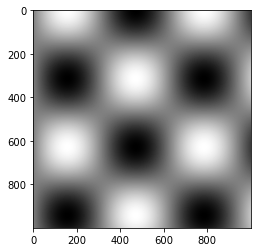

In [5]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I, cmap='gray') #采用灰度配色的图形
plt.show()

matplotlib所有可用的配色方案都在plt.cm命名空间中。

#### 选择配色方案

有了这么多能够选择的配色方案只是第一步，重要的是如何确定用那种方案。一般情况下我们只需要关注三种不同的配色方案：

- 顺序配色方案，由一组连续的颜色构成的配色方案（例如`binary`或`viridis`）；

- 互逆配色方案，通常由两种互补的颜色构成，表示正反两种含义（例如`RdBu`或`PuOr`）；

- 定性配色方案，随机顺序的一组颜色（例如`rainbow`或`jet`）。

`jet`是一种定性配色方案，定性配色方案在对定性数据进行可视化时的选择空间非常有限。随着图形亮度的提高，经常会出现颜色无法区分的问题。接下来将演示几个常用的配色方案。

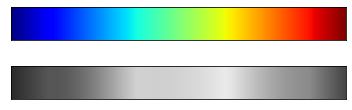

In [6]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

def grayscale_cmap(cmap):
    """为配色方案显示灰度图"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    # 将RGBA色转换为不同亮度的灰度值
    # 参考链接http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    """用等价的灰度图表示配色方案"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2),
    subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])
    
view_colormap('jet')
plt.show()

从上图我们观察灰度图里比较亮的那部分条纹。这些亮度变化不均匀的条纹在彩色图中对应某一段彩色区间，由于色彩太接近容易突显出数据集中不重要的部分，导致眼睛无法识别重点。更好的配色方案是viridis，它采用了精心设计的亮度渐变方式，这样不仅便于视觉观察，而且更清晰：

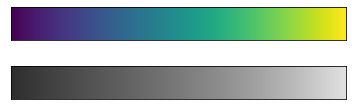

In [7]:
view_colormap('viridis')
plt.show()

还可以使用cubehelix实现彩虹效果，cubehelix配色方案可以可视化连续的数值：

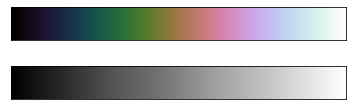

In [8]:
view_colormap('cubehelix')
plt.show()

还有一种可以用两种颜色表示正反两种含义的方案，实现函数为RdBu：

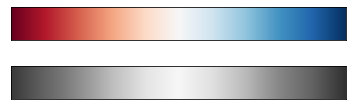

In [9]:
view_colormap('RdBu')
plt.show()

#### 颜色条刻度的限制与扩展功能的设置

`Matplotlib`提供了丰富的颜色条配置功能。由于可以将颜色条本身仅看作是一个`plt.Axes`实例，因此前面所学的所有关于坐标轴和刻度值的格式配置技巧都可以派上用场。颜色条有一些有趣的特性。

例如，我们可以缩短颜色取值的上下限，对于超出上下限的数据，通过`extend`参数用三角箭头表示比上限大的数或者比下限小的数。下面展示一张噪点图：

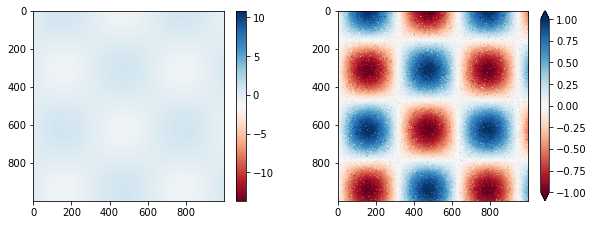

In [10]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')

plt.colorbar()
plt.subplot(1, 2, 2)

plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

左边的图是用默认的颜色条刻度限制实现的效果，噪点的范围覆盖掉了我们感兴趣的数据。而右边的图形设置了颜色条的刻度上下限，并在上下限之外增加了扩展功能。

#### 离散型颜色条

虽然大多数颜色条默认都是连续的，但有的时候你可能也需要表示离散数据。最简单的做法就是使用`plt.cm.get_cmap()`函数，将适当的配色方案的名称以及需要的区间数量传进去即可：

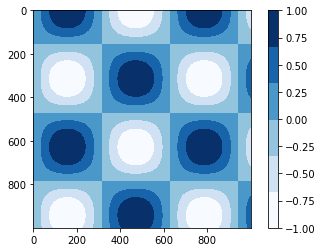

In [11]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

#### 手写数字

接下来我们将学习一个比较实用的案例，手写数字可视化图。数据在sklearn中，包含近2000份8x8的手写数字缩略图。

先下载数据，然后使用`plt.imshow()`对一些图形进行可视化：

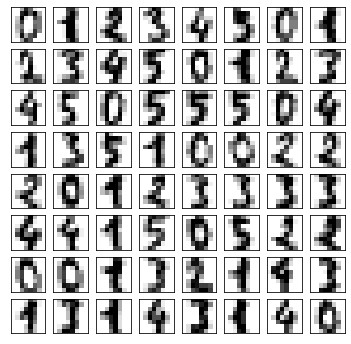

In [12]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

由于每个数字都由64像素的色相构成，因此可以将每个数字看成是一个位于64维空间的点，即每个维度表示一个像素的亮度。但是想通过可视化来描述如此高维度的空间是非常困难的。

一种解决方案是通过降维技术，在尽量保留数据内部重要关联性的同时降低数据的维度，例如流形学习。下面展示如何用流形学习将这些数据投影到二维空间进行可视化：

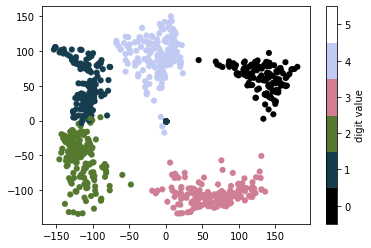

In [13]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
digits = load_digits(n_class=6)
projection = iso.fit_transform(digits.data)
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

比如数字5与数字3在投影中有大面积重叠，说明一些手写的5与3难以区分，因此自动分类算法也更容易搞混它们。其它的数字，像数字0与数字1，隔得特别远，说明两者不太可能出现混淆。

### 实操练习

#### 编程要求

在`Begin-End处`补充代码，根据输入数据绘制热成像图并隐藏坐标轴，具体要求如下：

- 图形的`figsize为(10, 10)`
- 图形保存到`./images/dv_t11.png`

In [19]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

def draw(data):
    plt.figure(figsize=(10,10))
    plt.imshow(data, cmap='hot')
    plt.colorbar()
    plt.xticks(())
    plt.yticks(())
    plt.savefig("./images/dv_t11.png")
    plt.show()

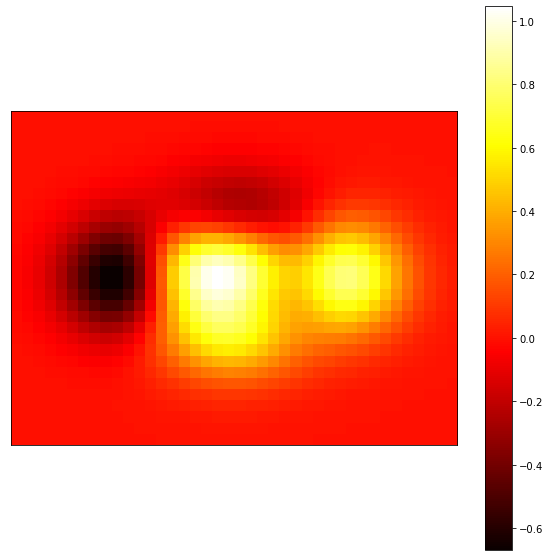

In [20]:
n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x, y)

draw(f(X,Y))